Dataset loaded successfully (Titanic).
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0        

/tmp/ipython-input-2916828326.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-2916828326.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

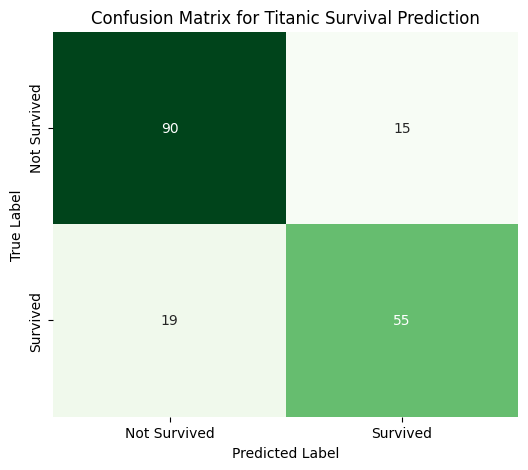


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Top Features influencing Prediction:
Sex_male      1.275766
Pclass        0.786491
Age           0.405107
SibSp         0.350685
Embarked_S    0.192089
dtype: float64


In [4]:
# ==========================================
# TASK 2: PREDICTIVE ANALYSIS (CLASSIFICATION)
# AUTHOR: [Your Name]
# INTERNSHIP: CodeTech IT Solutions
# ==========================================

# --- Step 1: Import Libraries and Load Alternative Dataset (Titanic) ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Titanic Dataset (Used for Classification: Survival Prediction)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Dataset loaded successfully (Titanic).")
print(df.head())

# --- Step 2: Data Cleaning and Feature Selection (Adapted for Titanic) ---

# Select relevant numerical features and the target variable (Survived)
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()

# Handle Missing values (Ages are filled with the mean)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode Categorical Features ('Sex' and 'Embarked') using One-Hot Encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Features (X) and Target (y) separation
X = df.drop('Survived', axis=1)
y = df['Survived']
print("\nTarget Variable Distribution (0=No, 1=Yes):\n", y.value_counts())

# --- Step 3: Data Splitting and Scaling ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 4: Model Training (Logistic Regression) ---

# Training the Logistic Regression Model
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train_scaled, y_train)

# Performing Prediction
y_pred = model.predict(X_test_scaled)

# --- Step 5: Model Evaluation and Deliverable Insights ---

print("\n--- Model Evaluation (Predictive Analysis) ---")

# 5.1: Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f} (Model predicts correctly {accuracy*100:.2f}% of the time)")

# 5.2: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Titanic Survival Prediction')
plt.show()

# 5.3: Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5.4: Display Feature Importance
print("\nTop Features influencing Prediction:")
feature_importance = pd.Series(model.coef_[0], index=X.columns).abs().sort_values(ascending=False)
print(feature_importance.head())